
## Introducción
La base de datos seleccionada lleva por nombre New_York_City_Leading_Causes_of_Death,generado por el organismo de NYC Opendata esta base de datos cuenta con 7 columnas las cuales son los encabezados y alrededor de 1520 filas, lo que nos muestran estos datos es acerca de las defunciones por distintas causas/enfermedades en la ciudad de NY, especificando la cantidad de muertes por esa causa el año en el que se registraron dichos fallecimientos, el sexo de la persona fallecida y su raza etnia.
Mis variables de interes son: 'Year', 'Leading Cause', 'Sex', 'Race ethnicity'.
La varibale 'Year' Nos especifica el año en el que se registraron dichas defunciones.
La variable 'Leading Cause' Nos dice cual fue la razón/causa de dicha defunción.
La variable 'Sex' representa si la persona fallecida es hombre o mujer
La variabe 'Race Ethnicity' depende de la raza etnia a la que pertenece dicha persona, por ejemplo Hispanic, Asian, Other.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%ls datasets/

adult.csv                  headbrain.csv
airline_data.csv           mic2.xlsx
antropometria00.csv        mic.xlsx
antropometria-dataset.csv  movies.csv
Book3.csv                  New_York_City_Leading_Causes_of_Death.xlsx
Canada.xlsx                nhanes_2015_2016.csv
Cartwheeldata.csv          NYC_Causes_of_Death.xlsx
census.csv                 pokemon.csv
coches.csv                 sample_pivot.csv
cwurData.csv               tips.csv
data.csv                   weight-height.csv


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns

In [7]:
df= pd.read_excel('datasets/NYC_Causes_of_Death.xlsx',
                  sheet_name = 'New_York_City_Leading_Causes_of',
                  engine= 'openpyxl')
df.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2015,Malignant Neoplasms (Cancer: C00-C97),F,Asian and Pacific Islander,515,79.7267,78.8654
1,2015,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Asian and Pacific Islander,498,77.0949,81.6051
2,2015,Cerebrovascular Disease (Stroke: I60-I69),F,Asian and Pacific Islander,95,14.7069,15.3379
3,2015,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,89,13.778,14.7064
4,2015,Diabetes Mellitus (E10-E14),F,Asian and Pacific Islander,71,10.9914,11.5374


In [8]:
df.columns

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

In [9]:
df.shape

(1516, 7)

In [10]:
#df['Year'].plot(kind='hist')

# Pregunta de investigación 1
Segun la base de datos, cual es el genero con la mayor cantidad de fallecidos en la ciudad de NY? Realiza un histograma para observarlo

Text(0, 0.5, 'Cantidad')

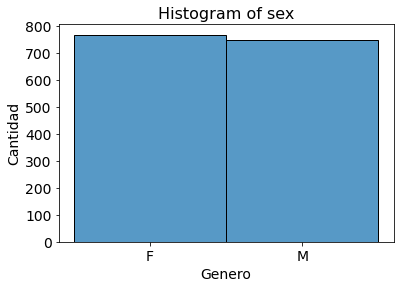

In [11]:
sns.histplot(df['Sex'],
             kde= False).set_title('Histogram of sex', fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.xlabel('Genero', fontsize = 14)
plt.ylabel('Cantidad', fontsize = 14)

In [12]:
df['Sex']

0       F
1       F
2       F
3       F
4       F
       ..
1511    F
1512    F
1513    F
1514    F
1515    M
Name: Sex, Length: 1516, dtype: object

## Conclusión pregunta 1
Como podemos observar en la grafica, el genero con mayor cantidad de fallecidos es 'F' es decir female y en español mujer por alrededor de 18 datos, dando esto un total de f=767 y m= 749  m= Male = Hombre

# Pregunta de investigación 2
¿En que año se registraron mas muertes por raza etnia?


In [13]:
pivote=pd.pivot_table(df,
                      #index = ['Year', 'Race Ethnicity'],
                      index = ['Year'],
                      values= 'Deaths',
                      columns= 'Race Ethnicity',
                      aggfunc= 'sum',
                     )
df2= pivote
df2.head(15)

,Race Ethnicity,Asian and Pacific Islander,Black Non-Hispanic,Hispanic,Non-Hispanic Black,Non-Hispanic White,Not Stated/Unknown,Other Race/ Ethnicity,White Non-Hispanic
Year,,,,,,,,,
2007,Deaths,2874.0,14258.0,8785.0,NaN,NaN,NaN,NaN,27479.0
2008,Deaths,2971.0,14006.0,9329.0,NaN,NaN,NaN,NaN,27131.0
2009,Deaths,3035.0,13775.0,9178.0,NaN,NaN,NaN,NaN,26210.0
2010,Deaths,3157.0,13637.0,9340.0,NaN,NaN,NaN,NaN,25790.0
2011,Deaths,3341.0,13910.0,9391.0,NaN,NaN,NaN,NaN,25549.0
2012,Deaths,3446.0,13864.0,9420.0,NaN,NaN,NaN,NaN,24904.0
2013,Deaths,3651.0,13911.0,9672.0,NaN,NaN,906.0,NaN,24891.0
2014,Deaths,3880.0,13755.0,9687.0,NaN,NaN,NaN,NaN,24533.0
2015,Deaths,4078.0,NaN,10182.0,14178.0,24568.0,977.0,137.0,NaN


In [14]:
#df2_top10= df2.sort_values(by= 2007,
  #                         ascending = False ,
   #                        axis = 1)
#df2_top10= df2_top10.head(10)
#df2_top10.drop([2017], inplace= True , axis=1)
#df2_top10
    

    
    
    
#(kind='line', figsize=(10,5))

#plt.xticks(fontsize = 8)
#plt.yticks(fontsize = 8)

#plt.xlabel('Raza', fontsize = 5)
#plt.ylabel('Cantidad', fontsize = 8)


    
    
    
#df2.plot()
#sns.boxplot(data=df2)

#df2.plot(kind='line', figsize=(15,8))

Text(0, 0.5, 'Años')

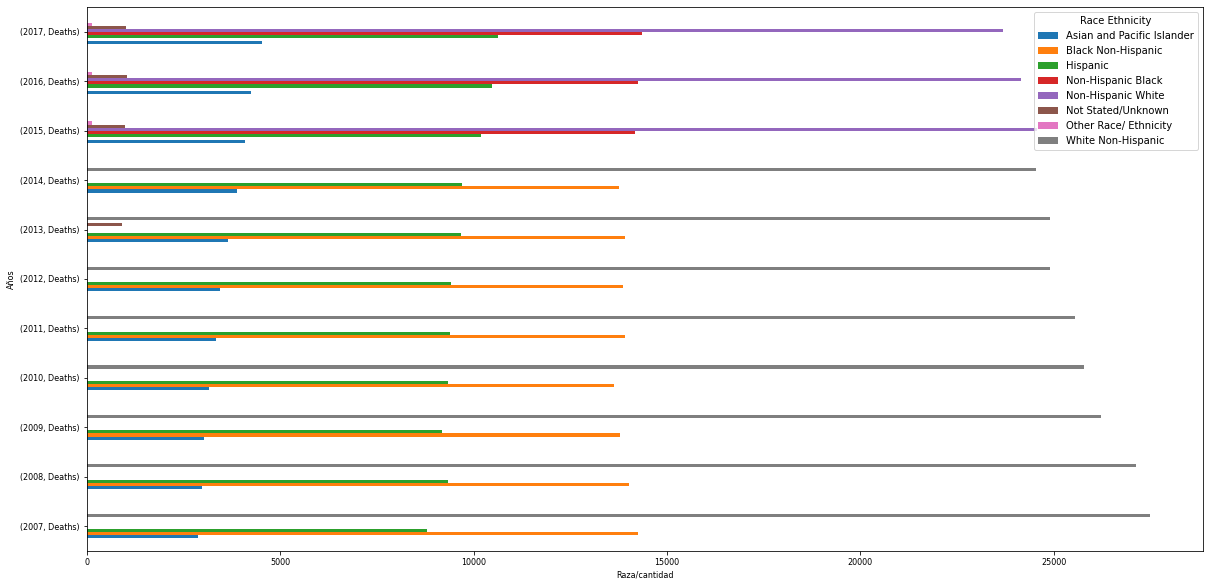

In [15]:
df2.plot(kind = 'barh', figsize = (20, 10))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

plt.xlabel('Raza/cantidad', fontsize = 8)
plt.ylabel('Años', fontsize = 8)


## Conclusión pregunta 2
Como podemos observar en la grafica de arriba, en todos los años se preseta una mayor cantidad de fallecidos de la raza etnia 'Blanco no hispano' solamente que del 2007 al 2014 esta escrito diferente al de 2015 a 2017.

# Pregunta 3
¿En que año del 2014 al 2017 se registraron mas muertes y que genero es la mayoria?

In [37]:
df3=pd.pivot_table(df,
                           #index= ['Year','Sex'],
                           index= 'Year',
                           values='Deaths',
                           aggfunc='sum',
                           columns = 'Sex',
                           
                          )
df3

,Sex,F,M
Year,,,
2014,Deaths,NaN,26090.0
2015,Deaths,27515.0,26605.0
2016,Deaths,27208.0,27072.0
2017,Deaths,27165.0,27154.0


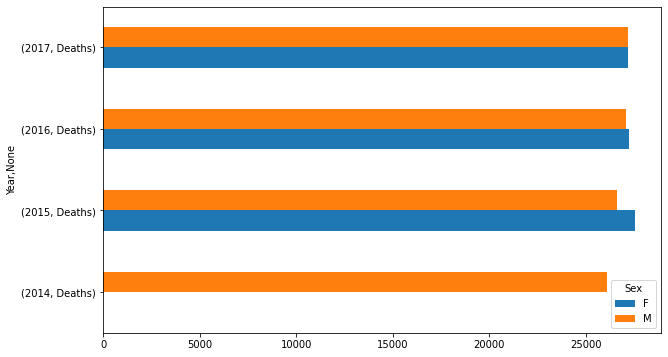

In [35]:
df3.plot(kind = 'barh', figsize = (10, 6))
#df[['Year', 'Deaths']]

## Conclusion pregunta 3
Como se puede observar en la grafica el año en el que se registran mas muertes es el 2015 siendo el genero de Female

In [ ]:
columz = df.columns.tolist()
columz.sort()
columz

['Age Adjusted Death Rate',
 'Death Rate',
 'Deaths',
 'Leading Cause',
 'Race Ethnicity',
 'Sex',
 'Year']

In [19]:
#df.groupby(['Year', 'Deaths']).size()

In [20]:
#df.describe()

In [21]:
#df['Year'].min()

In [22]:
#sns.distplot(df.Year,
           # kde = False)

In [23]:
#df['Deaths'].plot(kind='hist')

In [38]:
#sns.boxplot(data=delay_pivot)

In [32]:
#sns.lmplot(x= 'Deaths',
  #         y = 'Year',
   #        data= df,
    #       fit_reg = False,
     #      hue = 'Sex'
      #    )
#plt.title('Scatter plot de Sex vs Year', fontsize = 17)
#plt.xticks(fontsize = 16)
#plt.show